# INTRODUCTION TO PYTHON PROGRAMMING LANGUAGE

Python is a popular programming language. It was created by Guido van Rossum, and released in 1991.

It is used for:

- web development (server-side),
- software development,
- mathematics,
- system scripting.

**What can Python do?**
- Python can be used on a server to create web applications.
- Python can be used alongside software to create workflows.
- Python can connect to database systems. It can also read and modify files.
- Python can be used to handle big data and perform complex mathematics.
- Python can be used for rapid prototyping, or for production-ready software development.



**Why Python?**
- Python works on different platforms (Windows, Mac, Linux, Raspberry Pi, etc).
- Python has a simple syntax similar to the English language.
- Python has syntax that allows developers to write programs with fewer lines than some other programming languages.
- Python runs on an interpreter system, meaning that code can be executed as soon as it is written. This means that prototyping can be very quick.
- Python can be treated in a procedural way, an object-oriented way or a functional way.

**Good to know**

The most recent major version of Python is Python 3, which we shall be using in this workshop. However, Python 2, although not being updated with anything other than security updates, is still quite popular.

In [1]:
# The Print function is use to display the output

print("Hello World")

Hello World


In [2]:
# Creating a variable

name_of_school = "Thomas Adewumi University"
print(name_of_school)

level= 200
print(level)

Thomas Adewumi University
200


## Python Data Types

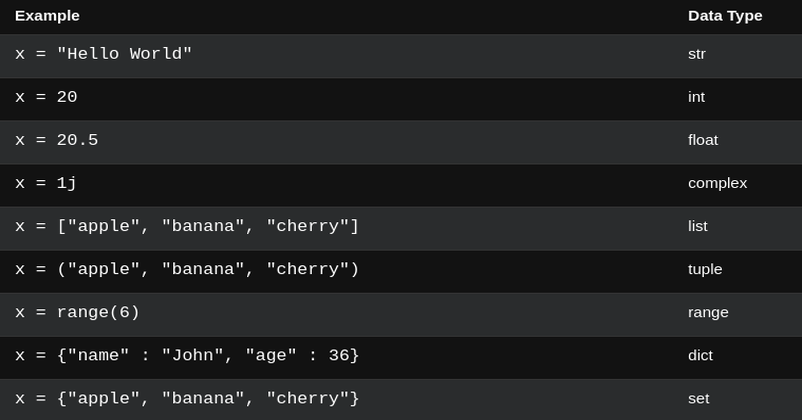

## Python Loops

Python has two primitive loop commands:

- while loops
- for loops

In [3]:
#The while loop
#With the while loop we can execute a set of statements as long as a condition is true.

i = 1
while i < 5:
    print(i)
    i += 1

1
2
3
4


In [4]:
#The break statment
i = 1
while i < 6:
    print(i)
    if i == 3:
        break
    i += 1


1
2
3


In [5]:
#A for loop is used for iterating over a sequence (that is either a list, a tuple, a dictionary, a set, or a string).

fruits = ["apple", "banana", "cherry"]
for x in fruits:
    print(x)

apple
banana
cherry


In [6]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
    print(x)
    if x == "banana":
        break

apple
banana


In [7]:
for x in "banana":
    print(x)

b
a
n
a
n
a


## Function

A function is a block of code which only runs when it is called.

You can pass data, known as parameters, into a function.

A function can return data as a result.

**Creating a Function**

In Python a function is defined using the def keyword:

In [8]:
def my_function():
    print("Hello World")    

In [9]:
# Calling a function

def my_function():
    print("Hello World")

my_function()

Hello World


In [10]:
def my_function(fname):
    print(fname + " Adewumi")

my_function("Thomas")

Thomas Adewumi


# PREDICTING PENGUINS SPECIES

**AIM**: Predicting penguine species

The data for this activity comes from a study of three different species of Antartic penguin: Adelie, Chinstrap and Gentoo.

In this notebook you will explore which features can be used to predict the species of a penguin.

You will build a model to predict whether a particular penguin is either a Gentoo,Adelie or Chinstrap penguin.

The dataset consists of 7 columns. 

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **culmen_length_mm**: culmen length (mm)
* **culmen_depth_mm**: culmen depth (mm)
* **flipper_length_mm**: flipper length (mm)
* **body_mass_g**: body mass (g)
* **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* **sex**: penguin sex


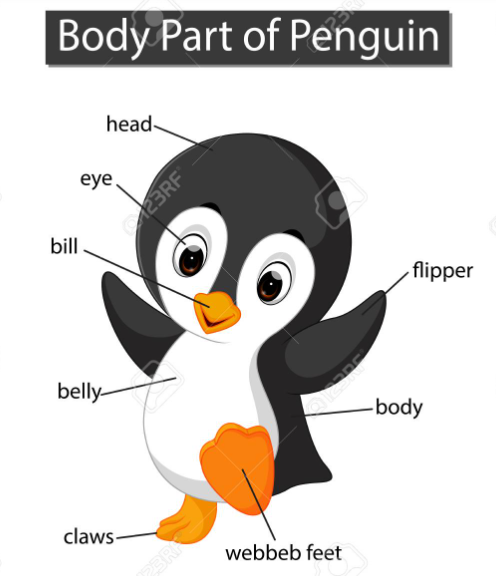

**DATASET**

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin sex

In [11]:

import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns







# Importing the dataset

In [12]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Understanding the data


In [13]:
df.info()

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
(344, 7)


In [14]:
print(df.shape)

(344, 7)


In [15]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [16]:
# Covariance

print('Covariance:')
df.cov()

Covariance:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [17]:
print('Correlation:')
df.corr()

Correlation:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


## Missing values

In [18]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [19]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [20]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Convert sex column to integer values

In [21]:
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df["island"] = lb.fit_transform(df["island"])

df['sex'][:5]

0    2
1    1
2    1
3    2
4    1
Name: sex, dtype: int64

# Analysing the data visually

## Number of Species

In [22]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:>

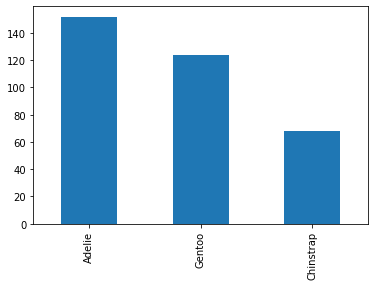

In [23]:
df['species'].value_counts().plot(kind='bar')

#df['species'].value_counts().plot.bar()


# Histogram


<AxesSubplot:ylabel='Frequency'>

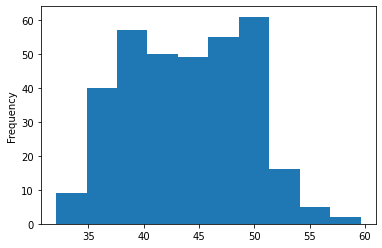

In [24]:
df["culmen_length_mm"].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

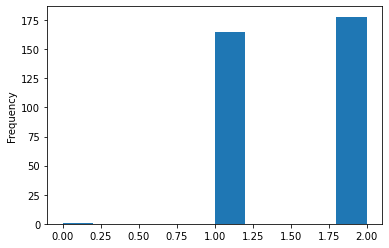

In [25]:
df["sex"].plot(kind='hist')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 18.9+ KB


# Data Preprocessing

Preparing the data for modelling

In [27]:
x= df.drop("species", axis=1)

y= df["species"]

In [28]:
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
3,2,41.1,17.0,190.0,3800.0,2
4,2,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...
339,0,41.1,17.0,190.0,3800.0,2
340,0,46.8,14.3,215.0,4850.0,1
341,0,50.4,15.7,222.0,5750.0,2
342,0,45.2,14.8,212.0,5200.0,1


In [29]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [30]:
#importing packages for modelling

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3)

In [32]:
#initialize the model

model= LogisticRegression()

#fit the model with the training set
model.fit(x_train, y_train)

/home/abdulsamod/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
pred= model.predict(x_test)
pred

array(['Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 

# Evaluate the performance of the model

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy= accuracy_score(pred, y_test)
accuracy


0.9807692307692307

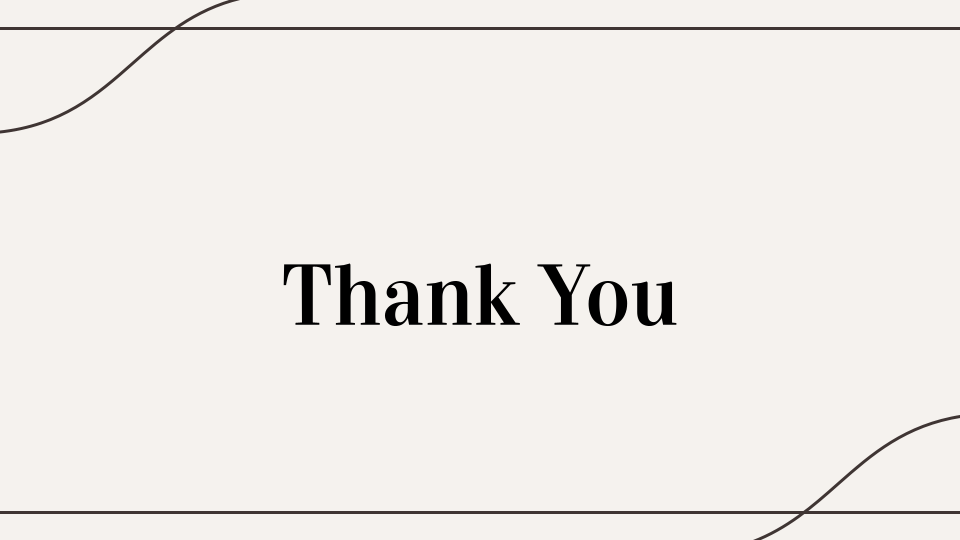